In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('reviews.csv')

In [19]:
df_listings = pd.read_csv('listings.csv')

In [4]:
df.shape

(947328, 6)

In [20]:
df_listings.shape

(37541, 75)

In [22]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [24]:
df_listings['id'].nunique()

37541

In [5]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [6]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [ ]:
df.info()

In [9]:
df.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      3
comments         209
dtype: int64

In [11]:
df.dropna(subset='comments', inplace=True)

In [12]:
df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    3
comments         0
dtype: int64

In [25]:
df['listing_id'].nunique()

26001

In [29]:
num_review_per_listing = df.groupby('listing_id')['comments'].count().sort_values(ascending=False).head(50)

In [28]:
df = df.sort_values('listing_id')

In [37]:
# Get the length of characters for reviews
df['character_len'] = [len(i.split()) for i in df['comments']]

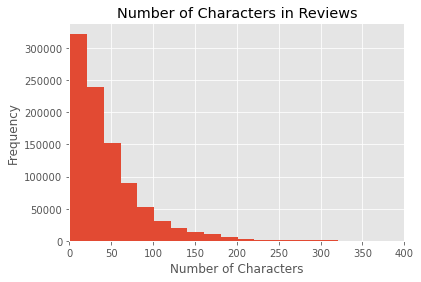

In [48]:
df['character_len'].plot.hist(bins=50)

plt.xlim(0,400)
plt.xlabel('Number of Characters')
plt.title('Number of Characters in Reviews')
plt.show()

In [34]:
df['comments'][1]

'Great experience.'

In [53]:
median = df['character_len'].median()
median

32.0

In [55]:
mean = df['character_len'].mean()
mean

45.21370070709172

In [59]:
df['character_len'].describe().round()

count    947119.0
mean         45.0
std          46.0
min           1.0
25%          15.0
50%          32.0
75%          60.0
max        1001.0
Name: character_len, dtype: float64

In [62]:
def has_meaningful_text(comment):
    return bool(comment.strip()) and bool(pd.Series(comment).str.contains(r'[a-zA-Z]', regex=True)[0])

# Filter out reviews without meaningful text
df_filtered = df[df['comments'].apply(has_meaningful_text)].reset_index(drop=True)

print(df_filtered)

KeyboardInterrupt: 

In [ ]:
df